<a href="https://colab.research.google.com/github/dequiroz/MTR37C-TemasC/blob/main/Object_Detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/C4/

Mounted at /content/drive
/content/drive/MyDrive/C4


In [2]:
import cv2
import numpy as np

# Cargar modelo preentrenado y clases empleadas
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
classes = open('coco.names').read().strip().split('\n')

In [7]:
# Cargar imagen y preparar data para la detección
image = cv2.imread('peaton.jpg')
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Realizar detección
detections = net.forward(output_layers)

person detected at 1582, 454 with 90.18% confidence
person detected at 1588, 507 with 99.79% confidence
bicycle detected at 1595, 645 with 81.21% confidence
person detected at 495, 720 with 100.00% confidence
person detected at 472, 714 with 56.16% confidence
person detected at 567, 717 with 97.82% confidence
bicycle detected at 1595, 664 with 55.51% confidence
person detected at 487, 750 with 94.68% confidence
person detected at 1658, 267 with 78.25% confidence
person detected at 1667, 269 with 90.03% confidence
person detected at 320, 317 with 76.79% confidence
person detected at 428, 299 with 81.04% confidence
person detected at 1671, 290 with 73.13% confidence
person detected at 324, 344 with 98.21% confidence
person detected at 1374, 356 with 98.39% confidence
person detected at 1748, 353 with 83.42% confidence
person detected at 960, 404 with 84.65% confidence
person detected at 959, 411 with 69.42% confidence
person detected at 978, 407 with 87.41% confidence
person detected at 

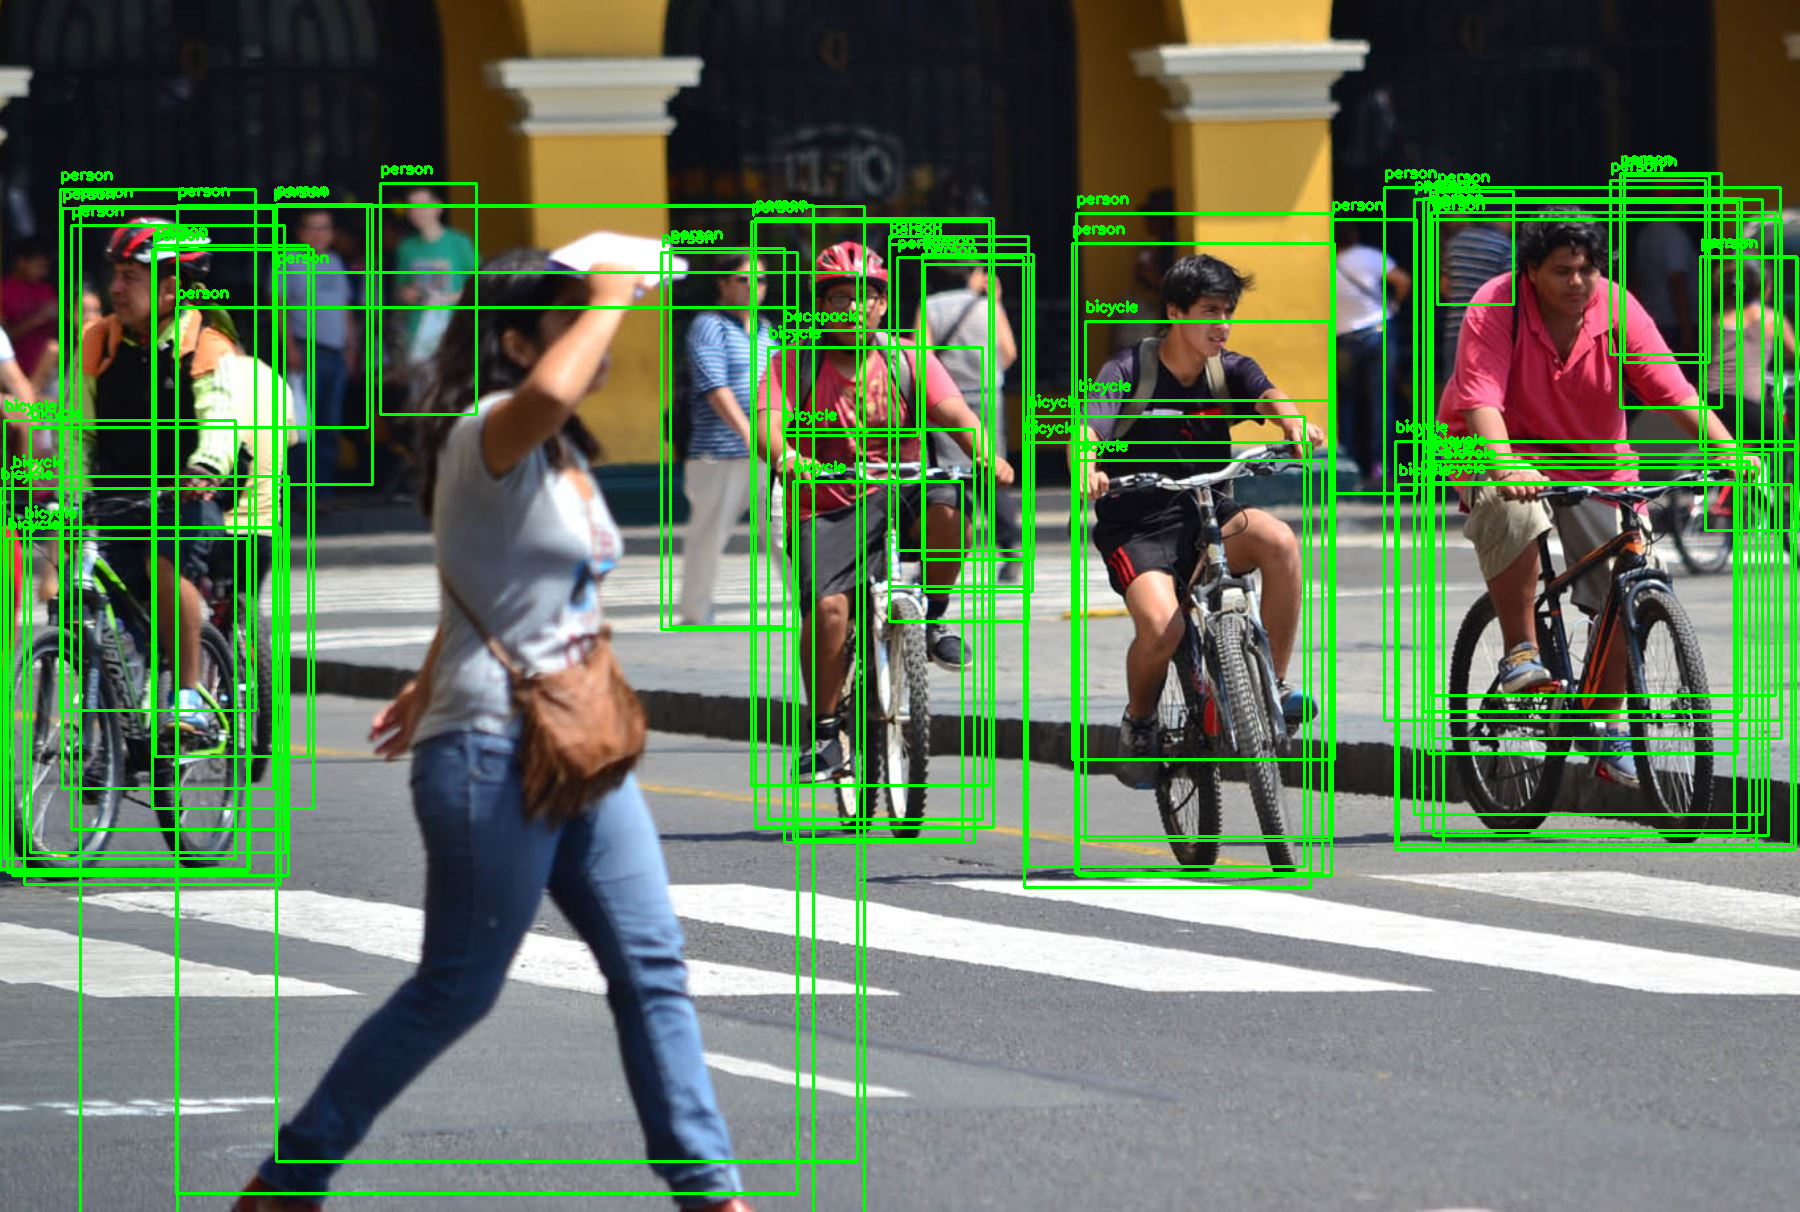

In [8]:
image_out = image.copy()

for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = (obj[0:4] * np.array([width, height, width, height])).astype(int)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image_out, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image_out, classes[class_id], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            print(f'{classes[class_id]} detected at {center_x}, {center_y} with {confidence*100:.2f}% confidence')

from google.colab.patches import cv2_imshow
cv2_imshow(image_out)